In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import tensorflow as tf

In [2]:
df = pd.read_json('../raw_data/splits/train.json')

In [3]:
df.head()

,0000e73d-4d1e-4241-a577-88103fc0961c,000156fb-6f29-4057-b26f-eca7ce9e9460,00025400-f7bd-477b-9363-18defd2d5466,0006c590-29cd-4a3d-8d81-26023ac346a0,000b01ec-1bc7-4a3c-8599-0ad88fa654e3,000d4aa7-d24b-4c88-83b7-492d13eede7b,000f7fb4-0791-407a-8f6c-d4c932e42edd,0010d3dc-c59b-49f1-9766-4274b3a4ce96,00111391-e478-4ad6-9f29-f31362cdb497,001225c9-0747-49aa-bad8-5ed99f2b0c80,...,14ce36ec-427c-11ea-a6f9-887873dd81ef,14ce36ed-427c-11ea-8ab3-887873dd81ef,14ce36ee-427c-11ea-82b5-887873dd81ef,14ce36ef-427c-11ea-80a7-887873dd81ef,14ce36f0-427c-11ea-b887-887873dd81ef,14ce36f1-427c-11ea-871b-887873dd81ef,14ce36f2-427c-11ea-91d2-887873dd81ef,14ce36f3-427c-11ea-ab8b-887873dd81ef,14ce36f4-427c-11ea-a529-887873dd81ef,14ce36f5-427c-11ea-b737-887873dd81ef
author,"(Mayer, 1851)","(Hübner, 1806)","(Linnaeus, 1767)","(Rottemburg, 1775)","(Denis & Schiffermüller, 1775)","(Linnaeus, 1758)","Pagenstecher, 1908","(Prunner, 1798)","(Linnaeus, 1758)","(Esper, 1781)",...,"(Guérin-Méneville, 1849)","Ménétriés, 1857","(Pfeiffer, 1931)","Hübner,[1826]","(Herrich-Schäffer, [1843])","Bremer, 1864","Butler, 1868","(Gerhard, 1850)","(Klug, 1832)","(Staudinger, 1882)"
barcode,ETHZ-ENT0012714,ETHZ-ENT0015323,ETHZ-ENT0019906,ETHZ-ENT0013615,ETHZ-ENT0042254,ETHZ-ENT0004104,ETHZ-ENT0119814,ETHZ-ENT0011755,ETHZ-ENT0037829,ETHZ-ENT0011293,...,ETHZ-ENT0019978,ETHZ-ENT0012798,ETHZ-ENT0026306,ETHZ-ENT0032375,ETHZ-ENT0026280,ETHZ-ENT0012306,ETHZ-ENT0012301,ETHZ-ENT0013111,ETHZ-ENT0039040,ETHZ-ENT0012316
country,Switzerland,Switzerland,Morocco,Switzerland,Switzerland,Switzerland,France,Austria,Italy,Switzerland,...,Israel,Japan,Lebanon,Spain,Turkey,Russia,Spain,Turkey,Palestine,Tajikistan
dec_lat,46.31,46.76594,30.2804,47.37659,47.36836,46.24431,None,47.61806,43.866667,46.77242,...,None,None,None,None,None,None,None,None,None,None
dec_long,7.8,9.89316,-9.1599,7.740225,7.73113,8.79397,None,15.14222,7.666667,9.8493,...,None,None,None,None,None,None,None,None,None,None


In [4]:
def data_transformation(df):
    data = df.T
    data["path_to_image"]="../raw_data/IMG/"+data["image_name"]
    data['species'] = data['genus']+' '+data['specific_epithet'] 
    return data

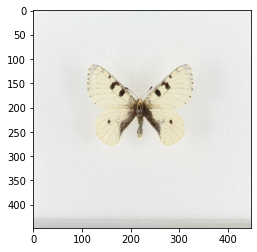

In [5]:
data = data_transformation(df)
img = Image.open(data["path_to_image"][100])
plt.imshow(img)

In [6]:
data_sample = data.sample(1000, random_state = 818)
data_sample.shape

(1000, 17)

In [7]:
# Créer un array avec les images
image = []
for i in data_sample['path_to_image'] :
    img = Image.open(i)
    img = img.resize((256,256))
    image.append(np.array(img))

In [8]:
image[0].shape

(256, 256, 3)

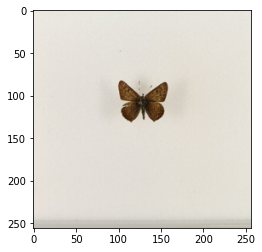

In [9]:
plt.imshow(image[0])

In [10]:
from tensorflow.keras.applications.vgg16 import VGG16

def load_model():
    # $CHALLENGIFY_BEGIN
    model = VGG16(weights="imagenet", include_top=False, input_shape=image[0].shape)
    # $CHALLENGIFY_END
    
    return model

In [11]:
model = load_model()
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

In [12]:
X = image
y = data_sample['species']

In [13]:
image

[array([[[237, 234, 227],
         [237, 234, 227],
         [234, 231, 224],
         ...,
         [230, 230, 222],
         [231, 231, 223],
         [231, 231, 223]],
 
        [[237, 234, 227],
         [236, 233, 226],
         [236, 233, 226],
         ...,
         [230, 230, 222],
         [233, 233, 225],
         [230, 230, 222]],
 
        [[236, 233, 226],
         [236, 233, 226],
         [235, 232, 225],
         ...,
         [231, 231, 223],
         [232, 232, 224],
         [231, 231, 223]],
 
        ...,
 
        [[194, 191, 184],
         [195, 192, 185],
         [194, 191, 184],
         ...,
         [202, 199, 187],
         [200, 198, 185],
         [197, 195, 182]],
 
        [[195, 192, 186],
         [194, 191, 186],
         [193, 190, 185],
         ...,
         [192, 190, 179],
         [192, 190, 179],
         [191, 190, 178]],
 
        [[192, 189, 185],
         [192, 189, 184],
         [194, 191, 186],
         ...,
         [187, 187, 177],
  

In [14]:
def set_nontrainable_layers(model):
    # Set the first layers to be untrainable
    model.trainable = False
    
    return model

model
model = set_nontrainable_layers(model)

model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

In [15]:
from tensorflow.keras import layers, models

def add_last_layers(model):
    '''Take a pre-trained model, set its parameters as non-trainables, and add additional trainable layers on top'''
    # $CHALLENGIFY_BEGIN
    base_model = set_nontrainable_layers(model)
    flatten_layer = layers.Flatten()
    dense_layer = layers.Dense(130, activation='relu')
    prediction_layer = layers.Dense(248, activation='softmax')
    
    
    model = models.Sequential([
        base_model,
        flatten_layer,
        dense_layer,
        prediction_layer
    ])
    # $CHALLENGIFY_END
    return model

In [16]:
model = add_last_layers(model)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 8, 8, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0         
_________________________________________________________________
dense (Dense)                (None, 130)               4259970   
_________________________________________________________________
dense_1 (Dense)              (None, 248)               32488     
Total params: 19,007,146
Trainable params: 4,292,458
Non-trainable params: 14,714,688
_________________________________________________________________


In [17]:
from tensorflow.keras import optimizers

def build_model():
    # $CHALLENGIFY_BEGIN    
    model = load_model()
    model = add_last_layers(model)
    
    opt = optimizers.Adam(learning_rate=1e-3)
    model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
    return model
    # $CHALLENGIFY_END

In [18]:
model = build_model()

In [19]:
from tensorflow.keras.applications.vgg16 import preprocess_input

In [20]:
len(X)

1000

In [21]:
from tensorflow.keras.backend import image_data_format

In [22]:
tf.keras.backend.image_data_format()

'channels_last'

In [23]:
tf.keras.backend.set_image_data_format('channels_last')

In [24]:
X[0].shape

(256, 256, 3)

In [25]:
len(X)

1000

In [26]:
df_train = data_transformation(pd.read_json('../raw_data/splits/train.json'))
df_val = data_transformation(pd.read_json('../raw_data/splits/val.json'))
df_test = data_transformation(pd.read_json('../raw_data/splits/test.json'))

In [27]:
def X_y_from_df(df, sample_size):
    data_sample = df.sample(sample_size, random_state = 818)
    image = []
    for i in data_sample['path_to_image'] :
        img = Image.open(i)
        img = img.resize((256,256))
        image.append(np.array(img))
    X = np.array(image)
    y = np.array(data_sample['species'])
    return X, y

In [28]:
X_val, y_val = X_y_from_df(df_val, 200)
X_test, y_test = X_y_from_df(df_test, 200)
X_train, y_train = X_y_from_df(data, 1000)

In [29]:
X_train = preprocess_input(X_train)
X_val = preprocess_input(X_val)
X_test = preprocess_input(X_test)

In [30]:
X_train.shape

(1000, 256, 256, 3)

In [31]:
X_val.shape

(200, 256, 256, 3)

In [32]:
y_train

array(['Lycaena tityrus', 'Clossiana titania', 'Argynnis paphia',
       'Nymphalis antiopa', 'Cupido minimus', 'Euphydryas cynthia',
       'Erebia aethiops', 'Thymelicus sylvestris', 'Melitaea didyma',
       'Coenonympha tullia', 'Aricia artaxerxes', 'Colias hyale',
       'Pieris bryoniae', 'Pieris bryoniae', 'Anthocharis cardamines',
       'Plebejus idas', 'Erebia triaria', 'Brenthis daphne',
       'Leptidea sinapis', 'Polyommatus dorylas', 'Plebejidea loewii',
       'Fabriciana adippe', 'Erebia meolans', 'Polyommatus icarus',
       'Lycaena virgaureae', 'Erebia mnestra', 'Plebejus idas',
       'Vanessa cardui', 'Boloria napaea', 'Lycaena virgaureae',
       'Parnassius mnemosyne', 'Plebejus idas', 'Araschnia levana',
       'Maniola jurtina', 'Colias alfacariensis', 'Melitaea aurelia',
       'Ochlodes venata', 'Maculinea teleius', 'Parnassius apollo',
       'Apatura ilia', 'Parnassius apollo', 'Pyrgus alveus',
       'Melanargia pherusa', 'Celastrina argiolus', 'Clossiana 

In [33]:
y_train.shape

(1000,)

In [34]:
y_val.shape

(200,)

In [63]:
y_val = y_val.reshape(200, 1)
y_train = y_train.reshape(1000, 1)
y_test = y_test.reshape(200, 1)

In [64]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False, handle_unknown = 'ignore')
ohe.fit(y_train)
y_cat = ohe.transform(y_train)
y_val_cat = ohe.transform(y_val)
y_test_cat = ohe.transform(y_test)

In [57]:
y_cat.shape

(1000, 248)

In [58]:
y_val_cat.shape

(200, 248)

In [59]:
X_train.shape

(1000, 256, 256, 3)

In [60]:
X_val.shape

(200, 256, 256, 3)

In [41]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_accuracy', mode='max', patience=3, verbose=1, restore_best_weights=True)

history = model.fit(X_train, y_cat, 
                    validation_data=(X_val, y_val_cat), 
                    epochs=50, 
                    batch_size=16, 
                    callbacks=[es])

2021-08-25 10:37:16.377129: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
63/63 [==============================] - 729s 12s/step - loss: 8.1991 - accuracy: 0.0450 - val_loss: 4.4710 - val_accuracy: 0.0200
Epoch 2/50
63/63 [==============================] - 742s 12s/step - loss: 4.9890 - accuracy: 0.0860 - val_loss: 4.3346 - val_accuracy: 0.0550
Epoch 3/50
63/63 [==============================] - 724s 12s/step - loss: 4.6784 - accuracy: 0.1180 - val_loss: 4.1841 - val_accuracy: 0.0500
Epoch 4/50
63/63 [==============================] - 763s 12s/step - loss: 4.4541 - accuracy: 0.1390 - val_loss: 3.9093 - val_accuracy: 0.0750
Epoch 5/50
63/63 [==============================] - 758s 12s/step - loss: 4.4051 - accuracy: 0.1350 - val_loss: 3.9442 - val_accuracy: 0.0550
Epoch 6/50
63/63 [==============================] - 856s 14s/step - loss: 4.2418 - accuracy: 0.1390 - val_loss: 3.9106 - val_accuracy: 0.0750
Epoch 7/50
63/63 [==============================] - 807s 13s/step - loss: 4.0884 - accuracy: 0.1430 - val_loss: 3.9256 - val_accuracy: 0.0700
Restor

In [68]:
# evaluate model
res_vgg = model.evaluate(X_test, y_test_cat)
test_accuracy_vgg = res_vgg[-1]
return (f"test_accuracy_vgg = {round(test_accuracy_vgg,2)*100} %")

7/7 [==============================] - 128s 19s/step - loss: 4.1093 - accuracy: 0.0800


SyntaxError: 'return' outside function (2431908968.py, line 4)

In [43]:
def plot_history(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    ax1.plot(history.history['loss'], label='train' + exp_name)
    ax1.plot(history.history['val_loss'], label='val' + exp_name)
    #ax1.set_ylim(0., 2.2)
    ax1.set_title('loss')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='train accuracy'  + exp_name)
    ax2.plot(history.history['val_accuracy'], label='val accuracy'  + exp_name)
    #ax2.set_ylim(0.25, 1.)
    ax2.set_title('Accuracy')
    ax2.legend()
    return (ax1, ax2)

(<AxesSubplot:title={'center':'loss'}>,
 <AxesSubplot:title={'center':'Accuracy'}>)

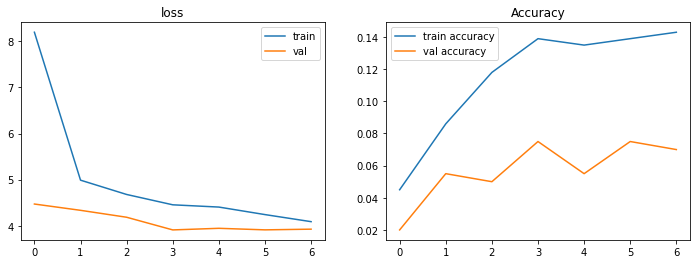

In [44]:
plot_history(history)